In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
df = pd.read_csv('./assets/Churn_Modelling.csv')

X = df.iloc[:,3:13]
y = df.iloc[:,13]

X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [21]:
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

X = pd.concat([X,geography,gender], axis=1).drop(['Geography', 'Gender'], axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [23]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adamax
from keras.callbacks import EarlyStopping

In [24]:
def build_model(learning_rate=0.005, num_neurons = 6):
    classifier = Sequential()
    classifier.add(Dense(num_neurons, kernel_initializer="he_uniform", activation="relu", input_dim=11))
    classifier.add(Dense(num_neurons, kernel_initializer="he_uniform", activation="relu"))
    classifier.add(Dense(1, kernel_initializer="glorot_uniform", activation="sigmoid"))

    adamax = Adamax(learning_rate= learning_rate)

    classifier.compile(optimizer=adamax, loss="binary_crossentropy", metrics=['accuracy'])

    return classifier

In [30]:
learning_rate = [0.01, 0.05, 0.001, 0.005]
num_neurons = [6,12,18]
batch_size = [32,64,128]

best_accuracy = 0
best_params = {}
best_history = None
best_model = None

for lr in learning_rate:
    for nm in num_neurons:
        for bs in batch_size:
            print('---------------------------')
            print(f'lr: {lr}  nm: {nm},  bs: {bs}')
            print('---------------------------')
            model = build_model(learning_rate=lr, num_neurons=nm)
            model_history = model.fit(X_train,y_train, validation_split=0.33, batch_size=bs, epochs=100, callbacks=[EarlyStopping(monitor='loss', patience=5)])
            accuracy = max(model_history.history['accuracy'])
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'lr': lr, 'nm': nm, 'bs':bs}
                best_history = model_history
                best_model = model

---------------------------
lr: 0.01  nm: 6,  bs: 32
---------------------------
Epoch 1/100


C:\Users\Student\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


168/168 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6809 - loss: 0.6447 - val_accuracy: 0.7929 - val_loss: 0.4654
Epoch 2/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.8094 - loss: 0.4432 - val_accuracy: 0.7963 - val_loss: 0.4495
Epoch 3/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.8139 - loss: 0.4387 - val_accuracy: 0.8020 - val_loss: 0.4393
Epoch 4/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.8108 - loss: 0.4248 - val_accuracy: 0.8099 - val_loss: 0.4293
Epoch 5/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - accuracy: 0.8248 - loss: 0.4021 - val_accuracy: 0.8160 - val_loss: 0.4164
Epoch 6/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accuracy: 0.8359 - loss: 0.3851 - val_accuracy: 0.8236 - val_loss: 0.4015
Epoch 7/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - accuracy: 0.8338 - loss: 0.3954 - val_accuracy: 0.8300 - val_loss: 0.3912
Epoch 8/100
168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.8413 - loss: 0.3761 - val_ac

In [32]:
print('Best Accuracy:',best_accuracy)
print('Best Params:', best_params)

Best Accuracy: 0.8913976550102234
Best Params: {'lr': 0.05, 'nm': 18, 'bs': 64}


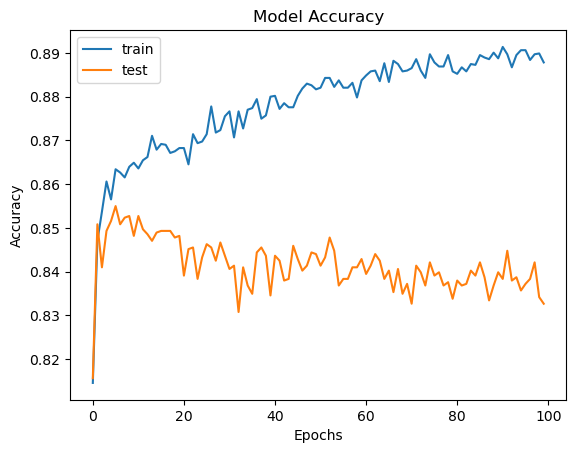

In [33]:
plt.plot(best_history.history['accuracy'])
plt.plot(best_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

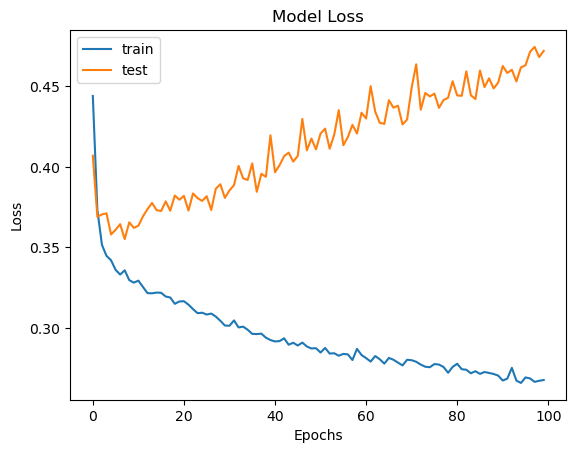

In [34]:
plt.plot(best_history.history['loss'])
plt.plot(best_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [35]:
y_pred = best_model.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step


In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_pred, y_test)
print(cm)

[[1484  218]
 [  88  210]]


In [37]:
score = accuracy_score(y_pred, y_test)
print('Accuracy Score:', score)

Accuracy Score: 0.847


In [38]:
best_model.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.8353 - loss: 0.5110


[0.4497607946395874, 0.847000002861023]